In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [2]:
import sympy
print(sympy.__version__)

0.7.6.1


In [29]:
Re, Rm, omega0, B0, pi, Q, beta, c1, c2, rho, nu, eta, u0, du0 = symbols("R_e R_m Omega_0 B_0 pi Q beta c_1 c_2 rho nu eta u0 du0", real=True)
psi, u, A, B = symbols("psi u A B")
dt, dr, dz = symbols("d_t d_r d_z")
kr, kz = symbols("k_r k_z") 
r, z, t  = symbols("r, z, t")
sigma = symbols("sigma")

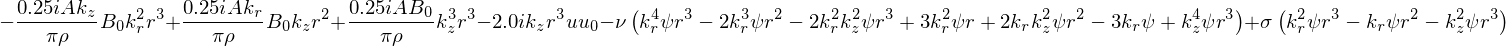

In [33]:
sigma*(-r**3*kz**2*psi + r**3*kr**2*psi - r**2*kr*psi) - r**2*2*r*u0*1j*kz*u + r**3*(1/(4*pi*rho))*B0*1j*kz**3*A + (1.0/(4*pi*rho))*B0*r**2*1j*kz*kr*A - (1.0/(4*pi*rho))*r**3*B0*1j*kz*kr**2*A - nu*(2*r**2*kz**2*kr*psi - 2*r**3*kz**2*kr**2*psi + r**3*kz**4*psi + r**3*kr**4*psi - 3*kr*psi + 3*r*kr**2*psi - 2*r**2*kr**3*psi)

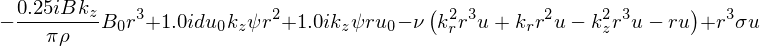

In [37]:
sigma*r**3*u + 1j*kz*r*u0*psi + 1j*kz*r*r*du0*psi - 1j*kz*r**3*(1/(4*pi*rho))*B0*B - nu*(-r**3*kz**2*u + r**3*kr**2*u + r**2*kr*u - r*u)

In [41]:
sigma*r*A - r*B0*1j*kz*psi - eta*(r*kr**2*A - r*kz**2*A - kr*A)

In [49]:
sigma*r**3*B + r*u0*1j*kz*A - r**3*B0*1j*kz*u - 1j*kz*r*r*du0*A - eta*(-r**3*kz**2*B + r**3*kr**2*B + r**2*kr*B - r*B)

In [58]:
LM = Matrix([[sigma*(-r**3*kz**2 + r**3*kr**2 - r**2*kr) - nu*(2*r**2*kz**2*kr - 2*r**3*kz**2*kr**2 + r**3*kz**4 + r**3*kr**4 - 3*kr + 3*r*kr**2 - 2*r**2*kr**3), -r**2*2*r*u0*1j*kz, r**3*(1/(4*pi*rho))*B0*1j*kz**3 + (1.0/(4*pi*rho))*B0*r**2*1j*kz*kr - (1.0/(4*pi*rho))*r**3*B0*1j*kz*kr**2, 0],
             [1j*kz*r*u0 + 1j*kz*r*r*du0, sigma*r**3 - nu*(-r**3*kz**2 + r**3*kr**2 + r**2*kr - r), 0, - 1j*kz*r**3*(1/(4*pi*rho))*B0],
             [-r*B0*1j*kz, 0, sigma*r - eta*(r*kr**2 - r*kz**2 - kr), 0],
             [0, -r**3*B0*1j*kz, r*u0*1j*kz - 1j*kz*r*r*du0, sigma*r**3 - eta*(-r**3*kz**2 + r**3*kr**2 + r**2*kr - r)]])

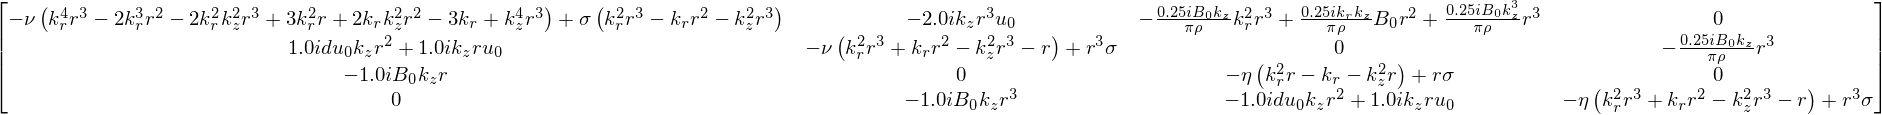

In [72]:
LM

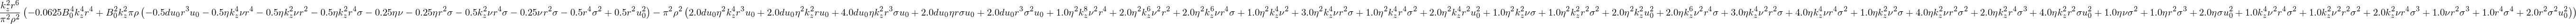

In [63]:
((LM.subs(kr, 0)).det()).simplify()

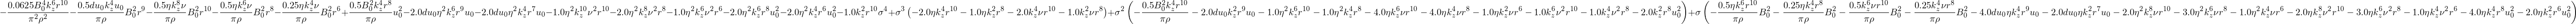

In [78]:
collect((LM.subs(kr, 0)).det(), sigma)

In [80]:
disp = LM.det()

In [82]:
func = lambdify((kr, nu, eta, r, rho, pi, B0), disp)

nu = 3.26e-3 $cm^2/s$

eta = 2000 $cm^2/s$

rho = 6 $g/cm^3$

B0 = 3000 G

In [84]:
goodmanjiparams = func(0, 3.26E-3, 2000, 10.0, 6, np.pi, 3000)